# Object Detection with YOLO V3
This notebook uses transfer learning to train YOLO V3 on 500 images of Lego Batman.

### Download Weights
1. Download the file named `yolov3-spp-ultralytics.pt` from this [link](https://drive.google.com/drive/folders/1LezFG5g3BCW6iYaV89B2i64cqEUZD7e0).
2. Create a folder named `weights` inside the `YoloV3` directory and move the file `yolov3-spp-ultralytics.pt` into that folder.

## Loading Files with Google Drive (works only on Google Colab)
Upload all the files and pre-trained model weights to the root folder of your Google Drive and run the cell below.

**Note**: Run the cell below only if you are running the notebook on Google Colab.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Loading Files Directly

Keep the directory `YoloV3` in the same path as the notebook.

## Import Packages

In [0]:
import os
import time
import glob
import torch

from IPython.display import Image, clear_output

## Go to YoloV3 Directory

Run the cell below if the files are loaded via Google Drive

In [0]:
cd gdrive/My Drive/YoloV3

/content/gdrive/My Drive/YoloV3


Run the cell below if the files are loaded directly

In [0]:
cd YoloV3

# Model Training

In [0]:
!python train.py --batch 10 --cache --epochs 300 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-batman.cfg', data='data/train/batman.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

2020-04-24 04:54:48.900498: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [06:01<00:00,  1.38it/s]
Caching images (0.2GB): 100% 500/500 [06:11<00:00,  1.35it/s]
Caching labels (500 found, 0 missing, 0 empty, 0 duplicate, for 500 images): 100% 500/500 [00:0

# Model Inference

In [0]:
!python detect.py --conf-thres 0.1 --output output

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-batman.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/batman.names', output='output', save_txt=False, source='data/test', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', total_memory=16280MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/1032 data/test/img001.jpg: 256x512 1 batmans, Done. (0.020s)
image 2/1032 data/test/img002.jpg: 256x512 1 batmans, Done. (0.018s)
image 3/1032 data/test/img003.jpg: 256x512 1 batmans, Done. (0.017s)
image 4/1032 data/test/img004.jpg: 256x512 1 batmans, Done. (0.020s)
image 5/1032 data/test/img005.jpg: 256x512 1 batmans, Done. (0.017s)
image 6/1032 data/test/img006.jpg: 256x512 1 batmans, Done. (0.020s)
image 7/1032 data/test/img007.jpg: 256x512 1 batmans, Done. (0.017s)
image 8/1032 data/test/img008.jpg: 256x512 1 batmans, Don

# Display Results

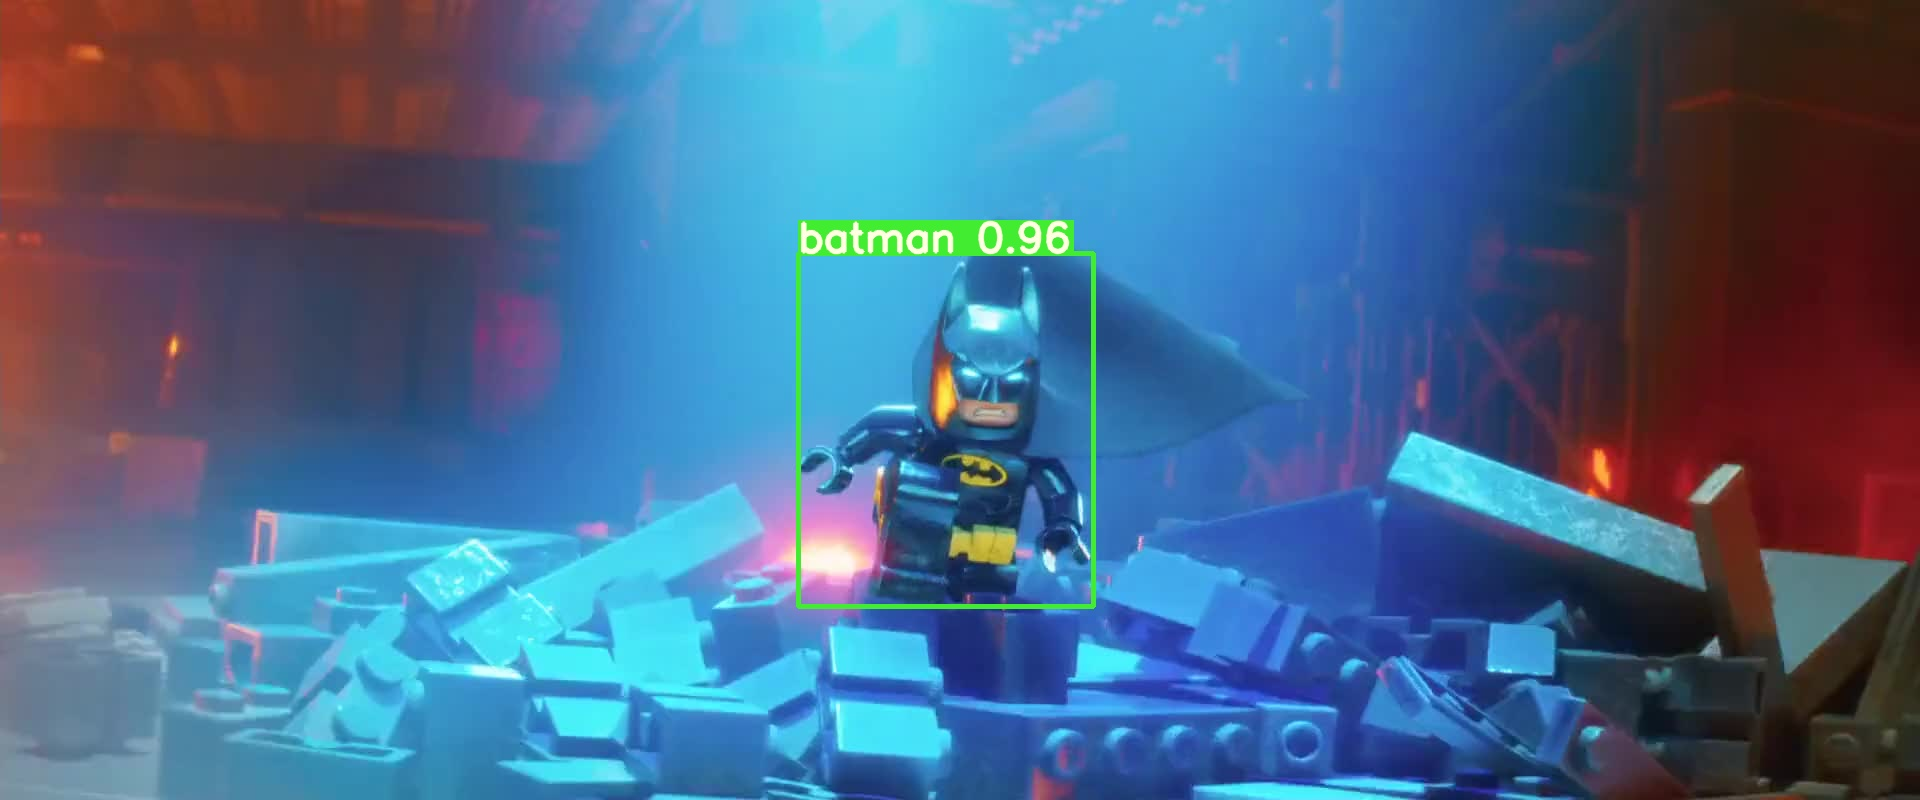

In [0]:
Image(filename='output/img001.jpg', width=600)

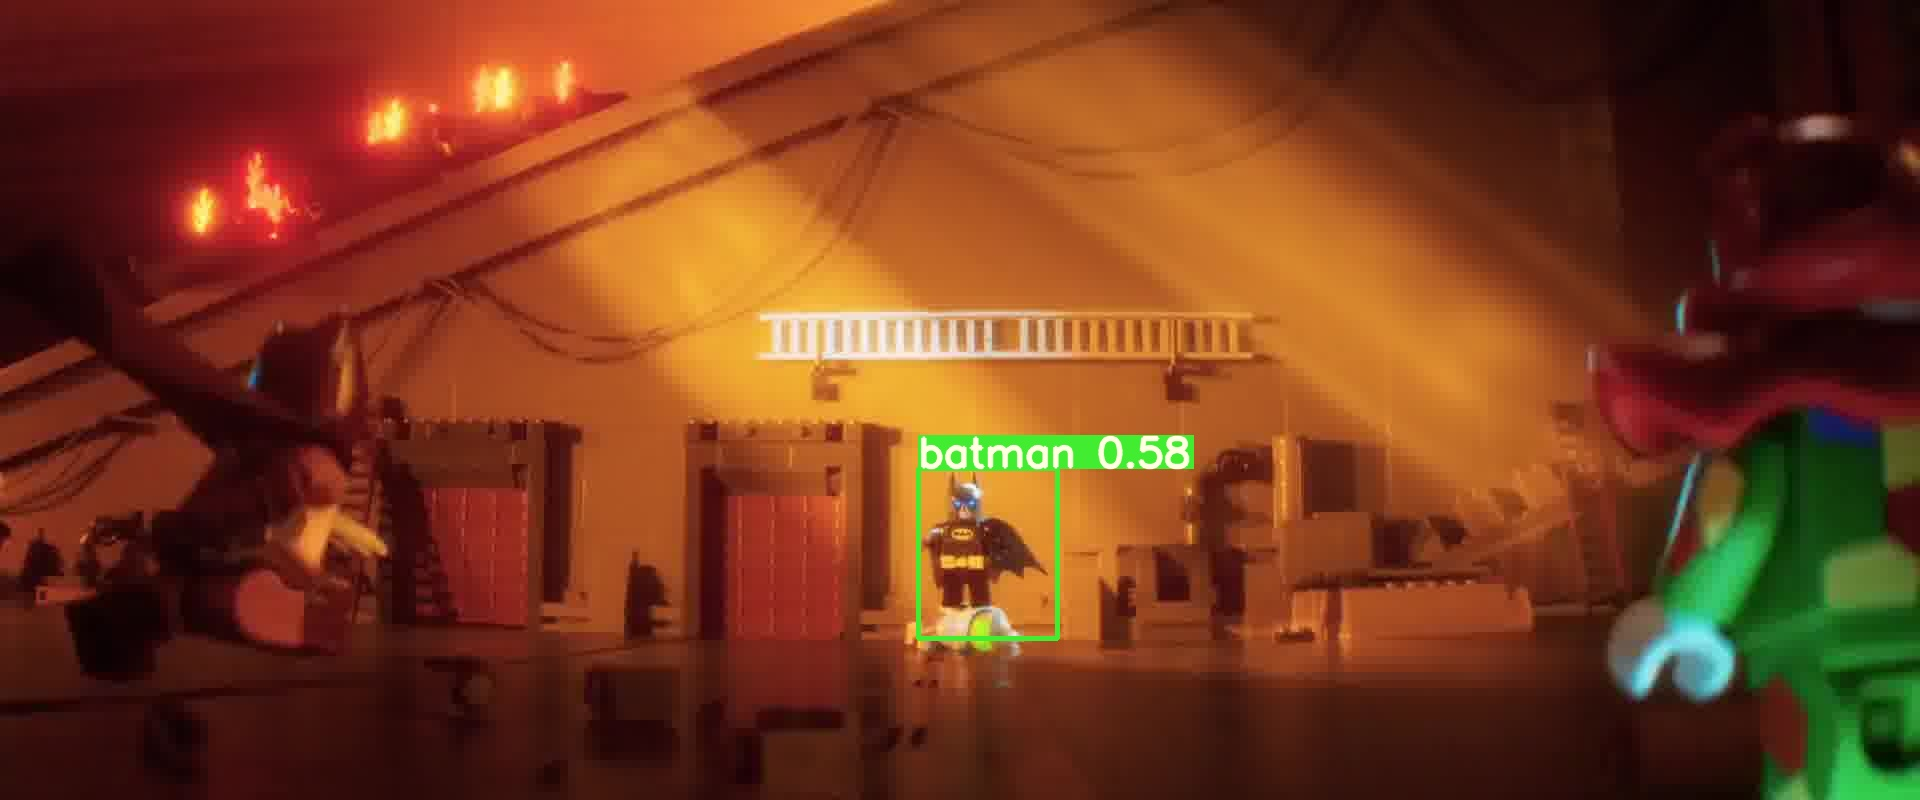

In [0]:
Image(filename='output/img448.jpg', width=600)

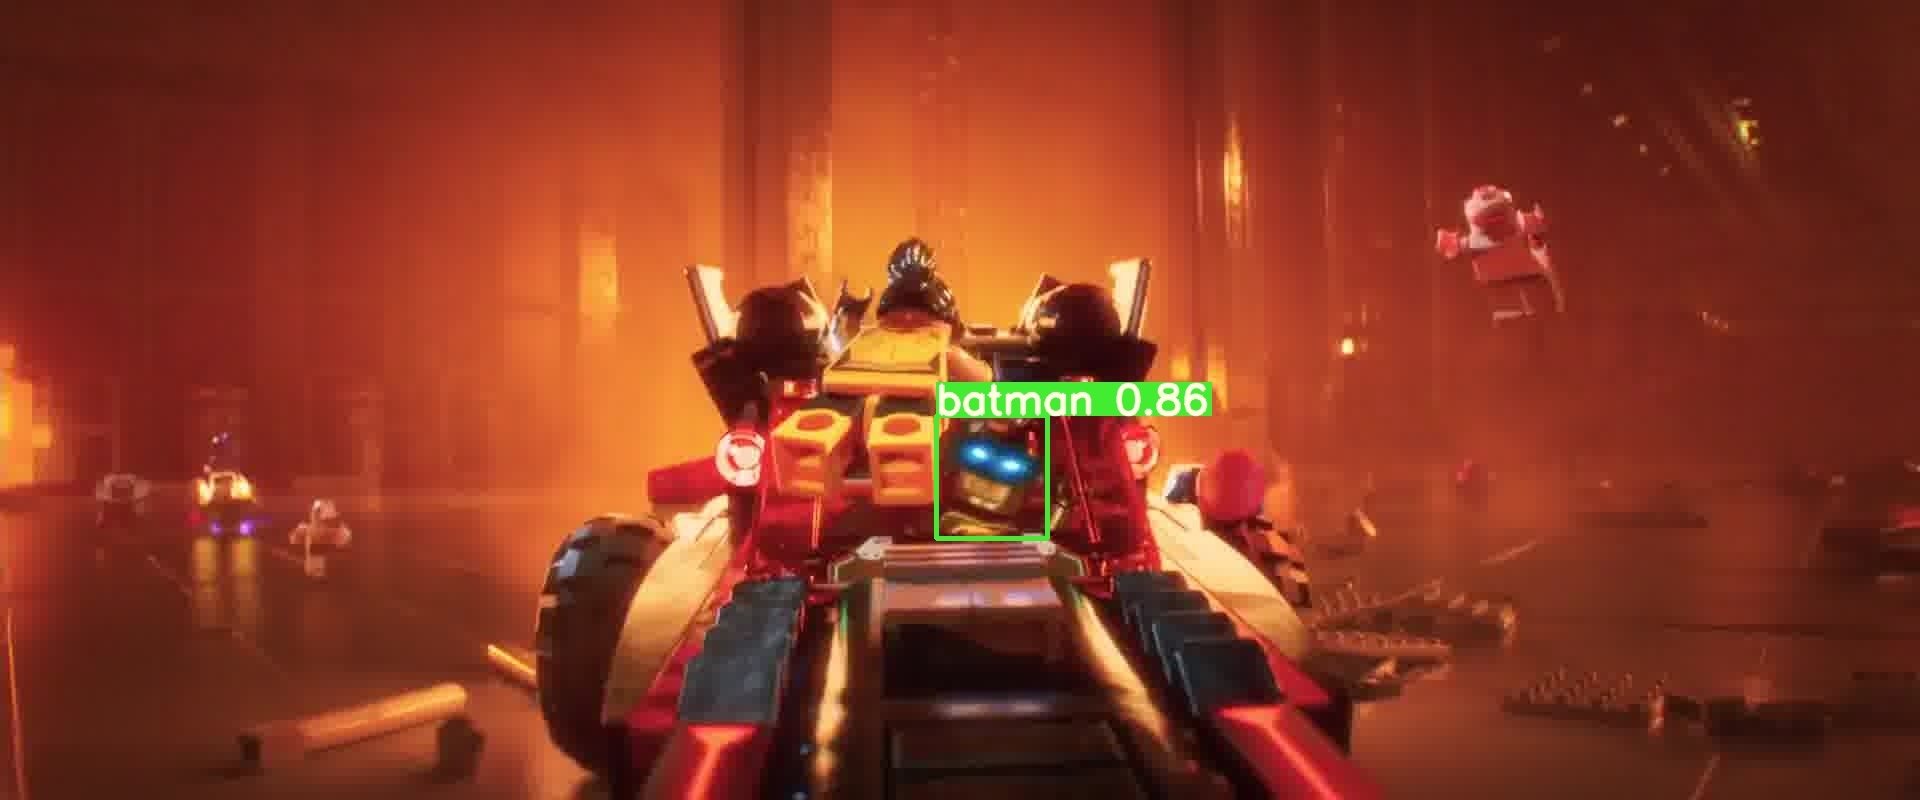

In [0]:
Image(filename='output/img624.jpg', width=600)

# Convert Output Frames to Video

In [0]:
!ffmpeg -framerate 24 -i output/img%3d.jpg -r 24 -y batman.mp4

ffmpeg version 3.4.6-0ubuntu0.18.04.1 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.3.0-16ubuntu3)
  configuration: --prefix=/usr --extra-version=0ubuntu0.18.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --ena